<p style="text-align:center; font-size:32px; font-weight:bold; color:blue;">
    K-Modes Clustering: Customer Complaints Model
</p>

## Table of Contents

- [Business Understanding](#1-business-understanding)
- [Analytical Approach, Data Requirement/Collection/Understanding](#2-analytical-approach-data-requirement-collection-understanding)
- [Exploratory Data Analysis (EDA)](#module-1-importing-data-sets)
- [Data Preparation (Python or SQL)](#module-2-data-wrangling)
- [Dealing with Imbalanced Datasets](#module-3-exploratory-data-analysis)
- [Model Development](#module-4-model-development)
- [Model Evaluation](#module-4-model-evaluation)
- [Model Deployment](#module-5-model-evaluation-and-refinement)


## 1: Business Understanding

The goal is to firstly use clustering to determine the factors contributing to high customer complaints and then to use these factors to develop a multi classification model to predict the likelihood of a specific FG being returned.

## Step 2: Analytical Approach, Data Requirement/Collection/Understanding

 #### 2.1. Analytical Approach: 
 K modes algorithm will be used since we are working with categorical variables. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means as with K means which is used for numerical values. KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance 
 
***********************************************************************
Read: https://www.analyticssteps.com/blogs/5-clustering-methods-and-applications

For numerical data the options are:
1) Centroid/Partion based clustering e.g K modes, CLARANS (Clustering Large Applications based upon Randomized Search)
2) Density based clustering e.g. DBSCAN (Density-based Spatial Clustering of Applications with Noise),OPTICS (Ordering Points to Identify Clustering Structure)
3) Distribution/Model based clustering
4) Hierarchial clustering e.g. BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies), CURE (Clustering Using Representatives)
5) Grid based clustering e.g. STING (Statistical Information Grid), Wave cluster, CLIQUE (Clustering In Quest)

For categorical data the options are:
1) Centroid/Partition based clustering e.g. K modes


For Mixed dataset (categorical and numerical): 
Read : https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
1) Centroid/Partion based clustering e.g. Partitioning Around Medoids (PAM) using Gowers distance, K-prototypes alogorithm (mixed of kmodes and kmeans algorithm), numerically encode categorical data e.g with one hot encoding before using a numerical method like k-means or DBSCAN
2) Dimensional Reduction e.g. Factorial analysis of mixed data (FAMD), Uniform manifold approximation and projection for dimensional reduction (UMAP)
3) Hierarchial Clustering and Gowers distance
 
 #### 2.2. Data Requirements: 
 Require customer returns data from call centre showing various factors that are attributed to returned   goods    
 #### 2.3. Data Collection: 
 Data will be collected from KP heat system
 #### 2.4. Data Attributes:
  | **Variable**             | **Description**                                           |
|--------------------------|-----------------------------------------------------------|
| **Plnt**                 | Plant that experienced customer returns                   |
| **SLoc**                 | Storage location of item                                  |
| **Name 1**               | Description of customer                                   |
| **Description**          | Nature of customer complaint                              |
| **Material**             | Material complaint logged on                              |
| **Volume**               | Packsize of material FG                                   |
| **City**                 | City of supplier                                          |
| **RSM**                  | Sales managers                                            |
| **SFG**                  | Semi-finished goods                                       |
| **StreamDescription**    | Manufacturing stream description                          |
| **StockedStatus**        | MTS or MTO batches                                        |
| **StockParetoABC**       | ABC category designation                                  |
| **ProductBusinessUnit**  | Sales category according to business unit                 |
| **ProductSalesCategory** | Sales Category                                            |
| **FamilyHierarchyL3**    | Further supply chain description                          |

 

#### 2.4. Data Understanding (Descriptive statistics/data visualization)

In [1]:
# Read the dataset (customer returns)

import pandas as pd  
pd.set_option('display.max_columns', None) 
df_returns = pd.read_excel('SA Returns Jan 2020 to March 2023.xlsx') 
df_returns

Plnt  SLoc Sold-to pt Ship-to                             Name 1  \
0       ZA13  CV01     102982  102982      Game Canal Walk G060(Century)   
1       ZA13  CV01     102982  102982      Game Canal Walk G060(Century)   
2       ZA13  CV01     102982  102982      Game Canal Walk G060(Century)   
3       ZA13  CV01     105105  105105  Plascon Personnel Acc For Own Use   
4       ZA13  CV01     100348  100348  Wellington Paint & H/W Bi - 35667   
...      ...   ...        ...     ...                                ...   
108277  ZA01  FA01      IC013   IC013        Sizwe Paints Pty Ltd - Deco   
108278  ZA13  CV01     102998  102998              Buco Bergvliet - 1459   
108279  ZA13  CV01     102998  102998              Buco Bergvliet - 1459   
108280  ZA15  CV01     104497  104497                Game Mthatha - G085   
108281  ZA17  CV01     101291  101291                     H & F Hardware   

       Created On      Time Created By OrdRs  \
0      2020-01-06  09:00:32    KAFRIKA    23   
1      2020-01-06  09:00:32    KAFRIKA    23   
2      2020-01-06  09:00:32    KAFRIKA    23   
3      2020-01-06  09:10:19    KAFRIKA    12   
4      2020-01-06  09:12:08    KAFRIKA    30   
...           ...       ...        ...   ...   
108277 2023-03-31  13:08:40     CSEOPA   Z33   
108278 2023-03-31  13:58:09  MMORUBANE   Z20   
108279 2023-03-31  14:10:22  MMORUBANE   Z03   
108280 2023-03-31  14:23:46     NNGCAI   Z03   
108281 2023-03-31  14:26:21  POPRFCUSR   Z06   

                                   Description  Sales Doc.  Item  \
0                    Short delivered by driver    60672237    80   
1                    Short delivered by driver    60672237   170   
2                    Short delivered by driver    60672237   180   
3              Incorrectly ordered by customer    60672244    10   
4                       B/O no longer required    60672245    10   
...                                        ...         ...   ...   
108277                  B/O no longer required    60981760    60   
108278                     Not to Spec: Colour    60981771    10   
108279  Customer Error/over stock/not required    60981772    80   
108280  Customer Error/over stock/not required    60981775    10   
108281               Short delivered by driver    60981776    10   

              Material       Batch  Order Quantity  SU  Net value Curr.  \
0       OCC000001-0005  M193833796               3  EA    1100.34   ZAR   
1       GTC000001-0005  M193333176               4  EA    1142.08   ZAR   
2       GTC000001-0001  M193333176               5  EA     389.30   ZAR   
3       TCR000002-0020  L194450935               1  EA     573.30   ZAR   
4       TDV001000-0049  L194050288               4  EA     796.28   ZAR   
...                ...         ...             ...  ..        ...   ...   
108277   UC000001-0005  M223540888               4  EA    1141.16   ZAR   
108278  TWA001000-0020  L223567101               2  EA    2730.00   ZAR   
108279     101801-7238  L230369072               1  EA      97.79   ZAR   
108280  BBO000605-0020  L224267973               4  EA    3723.60   ZAR   
108281  TLS001000-0020  L230369132               1  EA    1750.58   ZAR   

        Gross weight WUn  Volume VUn  Delivery  Item.1 Ac.GI date     Batch.1  \
0             21.486  KG    15.0   L  84128534      10 2020-01-06  M193833796   
1             21.400  KG    20.0   L  84128534      20 2020-01-06  M193333176   
2              5.600  KG     5.0   L  84128534      30 2020-01-06  M193333176   
3             24.550  KG    20.0   L  84128535      10 2020-01-06  L194450935   
4             12.376  KG     9.0   L  84128536      10 2020-01-06  L194050288   
...              ...  ..     ...  ..       ...     ...        ...         ...   
108277        29.200  KG    20.0   L  84172831      20 2023-03-31  M223540888   
108278        50.182  KG    40.0   L  84172848      10        NaT  L223567101   
108279         2.200  KG     2.0   L  84172833      10        NaT  L230

In [2]:
# read the mastersku data
import pandas as pd
pd.set_option('display.max_rows', 5)
df2 = pd.read_excel('MasterProductionPlanning.xlsx')
df2

ProductCode StockedStatus StockParetoABC  \
0     101002-2251           MTS              A   
1     101002-7241           MTS              C   
...           ...           ...            ...   
1750    XZTC/25KG           MTS              Y   
1751    XZTF/25KG           MTS              Y   

                            ProductDescription  PackSizeVol  PackNettWeight  \
0          Pcell Pfilla Int. Crack Filler-12kg       12.000        12.00000   
1       Pcell Pfilla Int. Crack Filler-20x500g       10.000        10.00000   
...                                        ...          ...             ...   
1750  Xeracolour Zero Voc-Tr Yellow Oxide-25kg       18.724        24.99654   
1751     Xeracolour Zero Voc-Tr Red Oxide-25kg       18.724        24.99654   

            SFG  SGConfirmed SFGResupply FGResupply  ProductBusinessUnit  \
0     FXA005168        1.000        ZA02       ZA02  DECORATIVE CONSUMER   
1     FXA005168        1.000        ZA02       ZA02  DECORATIVE CONSUMER   
...         ...          ...         ...        ...                  ...   
1750   XZTC-HOC        1.335        ZA09       ZA09           COLOURANTS   
1751   XZTF-HOC        1.335        ZA09       ZA09           COLOURANTS   

     ProductSalesCategory  Pallet  ShelfLife       Stream  \
0              SPECIALITY      60        NaN  ZA02_PP_PPO   
1              SPECIALITY      30        NaN  ZA02_PP_PPO   
...                   ...     ...        ...          ...   
1750           COLOURANTS      24        NaN  ZA09_BM_HOC   
1751           COLOURANTS      24        NaN  ZA09_BM_HOC   

         StreamDescription  
0       Powder Manufacture  
1       Powder Manufacture  
...                    ...  
1750  Hockmeyer Basketmill  
1751  Hockmeyer Basketmill  

[1752 rows x 16 columns]

In [3]:
#import data from MasterskuListWithSFG

import pandas as pd
pd.set_option('display.max_rows', 5)
df3 = pd.read_excel('MasterSKUListWithSFG.xlsx')
df3

CompanyCode     ProductCode StockedStatus           TopSKUs  \
0            8811     101002-2251           MTS  Top Consumer SKU   
1            8811     101002-7241           MTS       General SKU   
...           ...             ...           ...               ...   
2245         8814  ZMT000048-9925           MTS       General SKU   
2246         8814  ZPS000010-9925           MTO       General SKU   

     StockParetoABC                      ProductDescription  PackSizeVol  \
0                 A     Pcell Pfilla Int. Crack Filler-12kg         12.0   
1                 C  Pcell Pfilla Int. Crack Filler-20x500g         10.0   
...             ...                                     ...          ...   
2245              C               Utility Masking Tape-48MM          1.0   
2246              W                    Colad Paint Strainer          1.0   

               SFG  SGConfirmed SFGResupply FGResupply  ProductBusinessUnit  \
0        FXA005168          1.0        ZA02       ZA02  DECORATIVE CONSUMER   
1        FXA005168          1.0        ZA02       ZA02  DECORATIVE CONSUMER   
...            ...          ...         ...        ...                  ...   
2245  Not Relevant          1.0        EPZA       EPZA  DECORATIVE CONSUMER   
2246  Not Relevant          1.0         NaN        NaN           AUTOMOTIVE   

     ProductSalesCategory           Hierarchy               FamilyHierarchyL1  \
0              SPECIALITY  200112004120000489  Surface Preparation & Cleaning   
1              SPECIALITY  200112004120000489  Surface Preparation & Cleaning   
...                   ...                 ...                             ...   
2245            ANCILLARY  200142004920000527                  Ancillary Item   
2246            ANCILLARY      50000600000004                Ancilliary Items   

        FamilyHierarchyL2 FamilyHierarchyL3  Pallet  Layer  Tray  ShelfLife  \
0                Polycell  Polycell Fillers      60     10     1        NaN   
1                Polycell  Polycell Fillers      30      5     1        NaN   
...                   ...               ...     ...    ...   ...        ...   
2245              General     General Other       1      1     1        NaN   
2246  Bodyshop Essentials       Non Branded       1      1     1        NaN   

      MaterialCategory  ProductID  
0                  NaN        182  
1                  NaN        185  
...                ...        ...  
2245               NaN       6925  
2246               NaN       6932  

[2247 rows x 23 columns]

In [4]:
df_returns.dtypes

Plnt    object
SLoc    object
         ...  
REP     object
RSM     object
Length: 35, dtype: object

In [5]:
df_returns.shape
# the dataset has 42 columns and 81627 rows of data

(108282, 35)

In [6]:
df2.shape

(1752, 16)

In [7]:
df3.shape

(2247, 23)

In [8]:
pd.set_option('display.max_rows', None)
df_returns.describe()

Sales Doc.           Item  Order Quantity      Net value  \
count  1.082820e+05  108282.000000   108282.000000  108282.000000   
mean   6.084491e+07      93.020511        4.423210    2213.489947   
std    8.139289e+04     219.004646       14.764265    7183.414415   
min    6.067224e+07      10.000000        0.000000      -0.060000   
25%    6.078508e+07      20.000000        1.000000     336.830000   
50%    6.084668e+07      50.000000        2.000000     749.790000   
75%    6.091284e+07     110.000000        4.000000    1711.860000   
max    6.098178e+07    5090.000000     1000.000000  410178.840000   

        Gross weight         Volume      Delivery         Item.1  \
count  108282.000000  108282.000000  1.082820e+05  108282.000000   
mean       53.518828      41.934829  8.415433e+07   38865.011101   
std       189.739293     141.723835  1.180143e+04  182781.249139   
min         0.000000       0.000000  8.412853e+07      10.000000   
25%         5.000000       5.000000  8.414574e+07      10.000000   
50%        12.400000      10.000000  8.415512e+07      40.000000   
75%        36.260000      30.000000  8.416427e+07     100.000000   
max     12962.880000    8960.000000  8.417285e+07  900032.000000   

       Delivery quantity         Order  
count       108282.00000  1.082820e+05  
mean             3.61869  1.999428e+11  
std             13.74801  2.392188e+09  
min              0.00000  1.000000e+11  
25%              1.00000  2.000001e+11  
50%              1.00000  2.000001e+11  
75%              3.00000  2.000001e+11  
max           1000.00000  2.000001e+11

In [9]:
pd.set_option('display.max_rows', None)
df2.describe()

PackSizeVol  PackNettWeight  SGConfirmed       Pallet  ShelfLife
count  1752.000000     1750.000000  1750.000000  1752.000000        0.0
mean     12.741751       15.268358     1.227890   166.561073        NaN
std      30.649495       35.948393     0.396395   200.835069        NaN
min       0.000000        0.000000     0.720000     1.000000        NaN
25%       1.000000        1.300500     1.005000    24.000000        NaN
50%       5.000000        5.400000     1.180000    96.000000        NaN
75%      18.340000       22.066068     1.341750   378.000000        NaN
max     200.000000      336.000000    13.000000  1740.000000        NaN

In [10]:
pd.set_option('display.max_rows', None)
df3.describe()

CompanyCode  PackSizeVol  SGConfirmed     Hierarchy       Pallet  \
count  2247.000000  2247.000000  2183.000000  2.247000e+03  2247.000000   
mean   8811.098353    10.407693     1.171017  1.528104e+17   219.944815   
std       0.705299    27.564656     0.258427  1.120513e+17   243.110270   
min    8811.000000     0.020000     0.720000  1.000120e+13     1.000000   
25%    8811.000000     1.000000     1.000000  9.000040e+13    24.000000   
50%    8811.000000     4.495000     1.060000  2.000120e+17    96.000000   
75%    8811.000000    10.000000     1.270000  2.000820e+17   378.000000   
max    8818.000000   200.000000     3.124500  4.000140e+17  1740.000000   

             Layer         Tray  ShelfLife  MaterialCategory     ProductID  
count  2247.000000  2247.000000        0.0               0.0   2247.000000  
mean     27.047174     3.843792        NaN               NaN  11740.650200  
std      24.471265     3.311934        NaN               NaN   8577.140277  
min       1.000000     1.000000        NaN               NaN    182.000000  
25%       8.000000     1.000000        NaN               NaN   4133.500000  
50%      24.000000     4.000000        NaN               NaN   6812.000000  
75%      48.000000     6.000000        NaN               NaN  21289.500000  
max     144.000000    24.000000        NaN               NaN  23142.000000

In [11]:
pd.set_option('display.max_rows', 10)
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108282 entries, 0 to 108281
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Plnt               108282 non-null  object        
 1   SLoc               108136 non-null  object        
 2   Sold-to pt         108282 non-null  object        
 3   Ship-to            108282 non-null  object        
 4   Name 1             108282 non-null  object        
 5   Created On         108282 non-null  datetime64[ns]
 6   Time               108282 non-null  object        
 7   Created By         108282 non-null  object        
 8   OrdRs              108282 non-null  object        
 9   Description        108282 non-null  object        
 10  Sales Doc.         108282 non-null  int64         
 11  Item               108282 non-null  int64         
 12  Material           108282 non-null  object        
 13  Batch              83846 non-null   object  

In [12]:
pd.set_option('display.max_rows', 10)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCode           1752 non-null   object 
 1   StockedStatus         1752 non-null   object 
 2   StockParetoABC        1752 non-null   object 
 3   ProductDescription    1752 non-null   object 
 4   PackSizeVol           1752 non-null   float64
 5   PackNettWeight        1750 non-null   float64
 6   SFG                   1751 non-null   object 
 7   SGConfirmed           1750 non-null   float64
 8   SFGResupply           1752 non-null   object 
 9   FGResupply            1739 non-null   object 
 10  ProductBusinessUnit   1752 non-null   object 
 11  ProductSalesCategory  1752 non-null   object 
 12  Pallet                1752 non-null   int64  
 13  ShelfLife             0 non-null      float64
 14  Stream                1752 non-null   object 
 15  StreamDescription    

In [13]:
pd.set_option('display.max_rows', 10)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CompanyCode           2247 non-null   int64  
 1   ProductCode           2247 non-null   object 
 2   StockedStatus         2247 non-null   object 
 3   TopSKUs               2247 non-null   object 
 4   StockParetoABC        2247 non-null   object 
 5   ProductDescription    2247 non-null   object 
 6   PackSizeVol           2247 non-null   float64
 7   SFG                   2185 non-null   object 
 8   SGConfirmed           2183 non-null   float64
 9   SFGResupply           2202 non-null   object 
 10  FGResupply            2202 non-null   object 
 11  ProductBusinessUnit   2247 non-null   object 
 12  ProductSalesCategory  2247 non-null   object 
 13  Hierarchy             2247 non-null   int64  
 14  FamilyHierarchyL1     2247 non-null   object 
 15  FamilyHierarchyL2    

## 3: Exploratory Data Analysis (EDA)

In [14]:
# lets do joins on tables before EDA

# rename columns in dataframe for later joins
df2.rename(columns = {'ProductCode':'Material'}, inplace = True)
df3.rename(columns = {'ProductCode':'Material'}, inplace = True)

# do a left join on material columns
df_returns_join=pd.merge(df_returns,df2[['Material','SFG','StreamDescription','StockedStatus','StockParetoABC','ProductBusinessUnit','ProductSalesCategory']],on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns_join


Plnt  SLoc Sold-to pt Ship-to                         Name 1  \
0       ZA13  CV01     102982  102982  Game Canal Walk G060(Century)   
1       ZA13  CV01     102982  102982  Game Canal Walk G060(Century)   
...      ...   ...        ...     ...                            ...   
108280  ZA15  CV01     104497  104497            Game Mthatha - G085   
108281  ZA17  CV01     101291  101291                 H & F Hardware   

       Created On      Time Created By OrdRs  \
0      2020-01-06  09:00:32    KAFRIKA    23   
1      2020-01-06  09:00:32    KAFRIKA    23   
...           ...       ...        ...   ...   
108280 2023-03-31  14:23:46     NNGCAI   Z03   
108281 2023-03-31  14:26:21  POPRFCUSR   Z06   

                                   Description  Sales Doc.  Item  \
0                    Short delivered by driver    60672237    80   
1                    Short delivered by driver    60672237   170   
...                                        ...         ...   ...   
108280  Customer Error/over stock/not required    60981775    10   
108281               Short delivered by driver    60981776    10   

              Material       Batch  Order Quantity  SU  Net value Curr.  \
0       OCC000001-0005  M193833796               3  EA    1100.34   ZAR   
1       GTC000001-0005  M193333176               4  EA    1142.08   ZAR   
...                ...         ...             ...  ..        ...   ...   
108280  BBO000605-0020  L224267973               4  EA    3723.60   ZAR   
108281  TLS001000-0020  L230369132               1  EA    1750.58   ZAR   

        Gross weight WUn  Volume VUn  Delivery  Item.1 Ac.GI date     Batch.1  \
0             21.486  KG    15.0   L  84128534      10 2020-01-06  M193833796   
1             21.400  KG    20.0   L  84128534      20 2020-01-06  M193333176   
...              ...  ..     ...  ..       ...     ...        ...         ...   
108280       103.740  KG    80.0   L  84172834      10 2023-03-31  L224267973   
108281        26.507  KG    20.0   L  84172835      10 2023-03-31  L230369132   

        Delivery quantity SU.1         Order Manuf. Dte   SLED/BBD  \
0                       3   EA  200000078881 2019-10-15 2029-10-13   
1                       4   EA  200000077607 2019-09-17 2025-09-16   
...                   ...  ...           ...        ...        ...   
108280                  4   EA  200000118287 2022-11-02 2032-10-30   
108281                  1   EA  200000120145 2023-01-25 2033-01-22   

               City                      Street                         REP  \
0         Milnerton        Shop 549, Canal Walk    50000355 - Barend Venter   
1         Milnerton        Shop 549, Canal Walk    50000355 - Barend Venter   
...             ...                         ...                         ...   
108280      Mthatha   Shop no 34, Mthatha Plaza    50000355 - Barend Venter   
108281  Piet Retief  6 Mahommedia rd, Kempuille  50004383 - Ricardo Pereira   

                               RSM        SFG         StreamDescription  \
0        50003670 - Gerrie Stemmet  OCC000001         White Manufacture   
1        50003670 - Gerrie Stemmet  FXA000294  Enamel Blend Manufacture   
...                            ...        ...                       ...   
108280   50003670 - Gerrie Stemmet  BBO000605        Colour Manufacture   
108281  50003750 - Ettiene Pieters  FXA001106         White Manufacture   

       StockedStatus StockParetoABC      ProductBusinessUnit  \
0                MTS              B      DECORATIVE CONSUMER   
1                MTS              C      DECORATIVE CONSUMER   
...              ...            ...                      ...   
108280           MTS              A      DECORATIVE CONSUMER   
108281           MTS              A  DECORATIVE PROFESSIONAL   

       ProductSalesCategory  
0                SPECIALITY  
1                  MID-TIER  
...                     ...  
108280              PREMIUM  
108281              PREMIUM  

[108282 rows x 41 columns]

In [15]:
# do a left join on material columns
df_returns_join= pd.merge(df_returns_join,
                 df3[['Material','FamilyHierarchyL3']],   
                 on='Material', how='left')

pd.set_option('display.max_rows', 5)
df_returns_join

Plnt  SLoc Sold-to pt Ship-to                         Name 1  \
0       ZA13  CV01     102982  102982  Game Canal Walk G060(Century)   
1       ZA13  CV01     102982  102982  Game Canal Walk G060(Century)   
...      ...   ...        ...     ...                            ...   
108280  ZA15  CV01     104497  104497            Game Mthatha - G085   
108281  ZA17  CV01     101291  101291                 H & F Hardware   

       Created On      Time Created By OrdRs  \
0      2020-01-06  09:00:32    KAFRIKA    23   
1      2020-01-06  09:00:32    KAFRIKA    23   
...           ...       ...        ...   ...   
108280 2023-03-31  14:23:46     NNGCAI   Z03   
108281 2023-03-31  14:26:21  POPRFCUSR   Z06   

                                   Description  Sales Doc.  Item  \
0                    Short delivered by driver    60672237    80   
1                    Short delivered by driver    60672237   170   
...                                        ...         ...   ...   
108280  Customer Error/over stock/not required    60981775    10   
108281               Short delivered by driver    60981776    10   

              Material       Batch  Order Quantity  SU  Net value Curr.  \
0       OCC000001-0005  M193833796               3  EA    1100.34   ZAR   
1       GTC000001-0005  M193333176               4  EA    1142.08   ZAR   
...                ...         ...             ...  ..        ...   ...   
108280  BBO000605-0020  L224267973               4  EA    3723.60   ZAR   
108281  TLS001000-0020  L230369132               1  EA    1750.58   ZAR   

        Gross weight WUn  Volume VUn  Delivery  Item.1 Ac.GI date     Batch.1  \
0             21.486  KG    15.0   L  84128534      10 2020-01-06  M193833796   
1             21.400  KG    20.0   L  84128534      20 2020-01-06  M193333176   
...              ...  ..     ...  ..       ...     ...        ...         ...   
108280       103.740  KG    80.0   L  84172834      10 2023-03-31  L224267973   
108281        26.507  KG    20.0   L  84172835      10 2023-03-31  L230369132   

        Delivery quantity SU.1         Order Manuf. Dte   SLED/BBD  \
0                       3   EA  200000078881 2019-10-15 2029-10-13   
1                       4   EA  200000077607 2019-09-17 2025-09-16   
...                   ...  ...           ...        ...        ...   
108280                  4   EA  200000118287 2022-11-02 2032-10-30   
108281                  1   EA  200000120145 2023-01-25 2033-01-22   

               City                      Street                         REP  \
0         Milnerton        Shop 549, Canal Walk    50000355 - Barend Venter   
1         Milnerton        Shop 549, Canal Walk    50000355 - Barend Venter   
...             ...                         ...                         ...   
108280      Mthatha   Shop no 34, Mthatha Plaza    50000355 - Barend Venter   
108281  Piet Retief  6 Mahommedia rd, Kempuille  50004383 - Ricardo Pereira   

                               RSM        SFG         StreamDescription  \
0        50003670 - Gerrie Stemmet  OCC000001         White Manufacture   
1        50003670 - Gerrie Stemmet  FXA000294  Enamel Blend Manufacture   
...                            ...        ...                       ...   
108280   50003670 - Gerrie Stemmet  BBO000605        Colour Manufacture   
108281  50003750 - Ettiene Pieters  FXA001106         White Manufacture   

       StockedStatus StockParetoABC      ProductBusinessUnit  \
0                MTS              B      DECORATIVE CONSUMER   
1                MTS              C      DECORATIVE CONSUMER   
...              ...            ...                      ...   
108280           MTS              A      DECORATIVE CONSUMER   
108281           MTS              A  DECORATIVE PROFESSIONAL   

       ProductSalesCategory                         FamilyHierarchyL3  
0                SPECIALITY                          Plascon One Coat  
1                  MID-TIER            True Colour Bright Gloss

In [16]:
# determine unique categories within each categorical variable
# seperate only the categorical columns


# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df_returns_join.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df_returns_join[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame(value_counts_dict)

# Display the DataFrame of value counts for all columns
value_counts_df

#export to Excel and analyze further

Plnt  SLoc  Sold-to pt  Ship-to  \
ZA01                                      55845.0   NaN         NaN      NaN   
ZA13                                      25899.0   NaN         NaN      NaN   
...                                           ...   ...         ...      ...   
Plascoguard Gehopon 3000 WB Navy Light G      NaN   NaN         NaN      NaN   
Polyurethane 9:1                              NaN   NaN         NaN      NaN   

                                          Name 1  Created On  Time  \
ZA01                                         NaN         NaN   NaN   
ZA13                                         NaN         NaN   NaN   
...                                          ...         ...   ...   
Plascoguard Gehopon 3000 WB Navy Light G     NaN         NaN   NaN   
Polyurethane 9:1                             NaN         NaN   NaN   

                                          Created By  OrdRs  Description  \
ZA01                                             NaN    NaN          NaN   
ZA13                                             NaN    NaN          NaN   
...                                              ...    ...          ...   
Plascoguard Gehopon 3000 WB Navy Light G         NaN    NaN          NaN   
Polyurethane 9:1                                 NaN    NaN          NaN   

                                          Sales Doc.  Item  Material  Batch  \
ZA01                                             NaN   NaN       NaN    NaN   
ZA13                                             NaN   NaN       NaN    NaN   
...                                              ...   ...       ...    ...   
Plascoguard Gehopon 3000 WB Navy Light G         NaN   NaN       NaN    NaN   
Polyurethane 9:1                                 NaN   NaN       NaN    NaN   

                                          Order Quantity  SU  Net value  \
ZA01                                                 NaN NaN        NaN   
ZA13                                                 NaN NaN        NaN   
...                                                  ...  ..        ...   
Plascoguard Gehopon 3000 WB Navy Light G             NaN NaN        NaN   
Polyurethane 9:1                                     NaN NaN        NaN   

                                          Curr.  Gross weight  WUn  Volume  \
ZA01                                        NaN           NaN  NaN     NaN   
ZA13                                        NaN           NaN  NaN     NaN   
...                                         ...           ...  ...     ...   
Plascoguard Gehopon 3000 WB Navy Light G    NaN           NaN  NaN     NaN   
Polyurethane 9:1                            NaN           NaN  NaN     NaN   

                                          VUn  Delivery  Item.1  Ac.GI date  \
ZA01                                      NaN       NaN     NaN         NaN   
ZA13                                      NaN       NaN     NaN         NaN   
...                                       ...       ...     ...         ...   
Plascoguard Gehopon 3000 WB Navy Light G  NaN       NaN     NaN         NaN   
Polyurethane 9:1                          NaN       NaN     NaN         NaN   

                                          Batch.1  Delivery quantity  SU.1  \
ZA01                                          NaN                NaN   NaN   
ZA13                                          NaN                NaN   NaN   
...                                           ...                ...   ...   
Plascoguard Gehopon 3000 WB Navy Light G      NaN                NaN   NaN   
Polyurethane 9:1                              NaN                NaN   NaN   

                                          Order  Manuf. Dte  SLED/BBD  City  \
ZA01                                        NaN         NaN       NaN   NaN   
ZA13                                        NaN         NaN       NaN   NaN   
...                                         ...         ...       ...   ...   
Plascoguard Gehopon 3000 WB Nav

In [17]:
# Frequency distribution for categorical features
for column in df_returns_join.select_dtypes(include=['object']):
    print(f"Frequency distribution for {column}:")
    print(df_returns_join[column].value_counts())

Frequency distribution for Plnt:
ZA01    55845
ZA13    25899
        ...  
ZA04     1469
ZA06      289
Name: Plnt, Length: 7, dtype: int64
Frequency distribution for SLoc:
CV01    83488
FA01    23452
        ...  
RL01        3
FO02        2
Name: SLoc, Length: 9, dtype: int64
Frequency distribution for Sold-to pt:
100829    1227
171677     728
          ... 
104140       1
172601       1
Name: Sold-to pt, Length: 2094, dtype: int64
Frequency distribution for Ship-to:
100829      1227
171677       728
            ... 
50000812       1
104475         1
Name: Ship-to, Length: 2183, dtype: int64
Frequency distribution for Name 1:
The Red Paint Shop                   1227
Builders Express Thoyandou- Plasc     728
                                     ... 
Proplan KwaZulu Natal                   1
Makaoteng Build It - 21753              1
Name: Name 1, Length: 2137, dtype: int64
Frequency distribution for Time:
11:37:21    368
06:56:33    297
           ... 
02:16:41      1
14:26:21      1
N

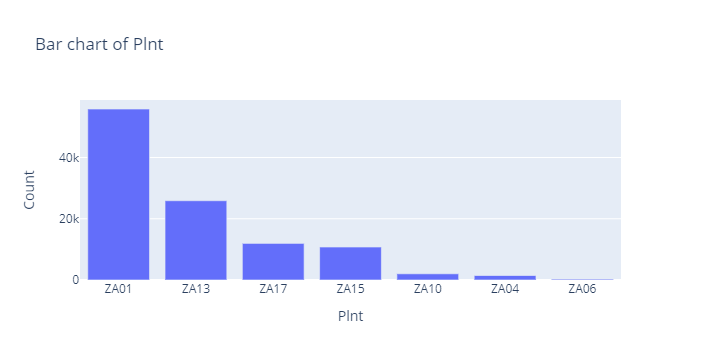

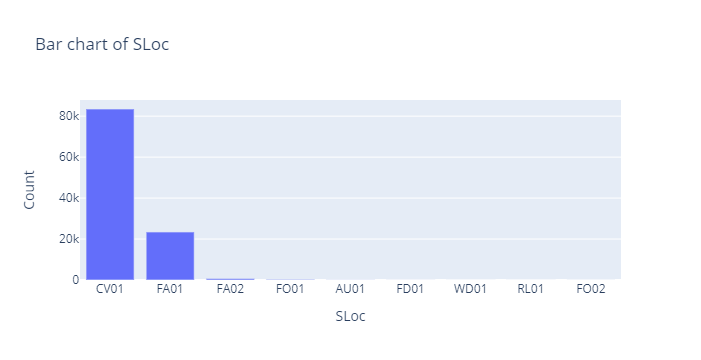

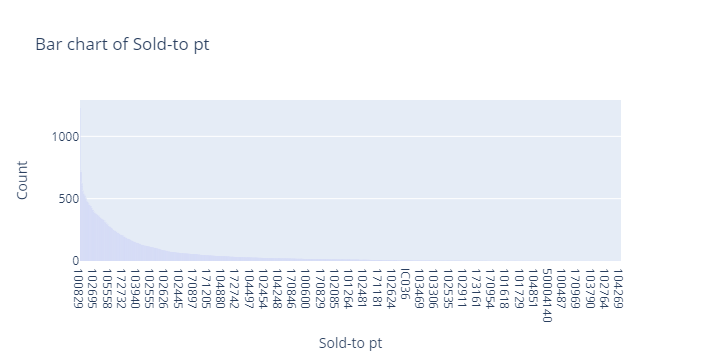

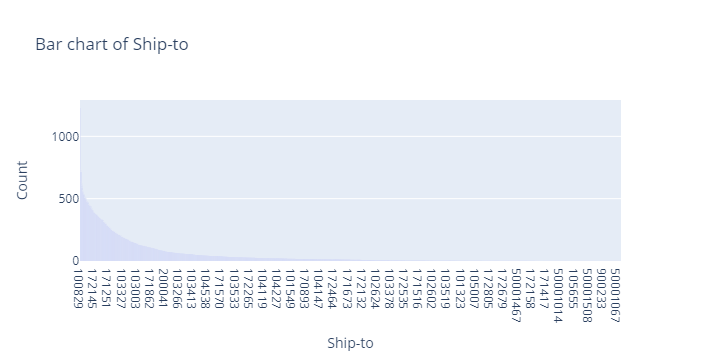

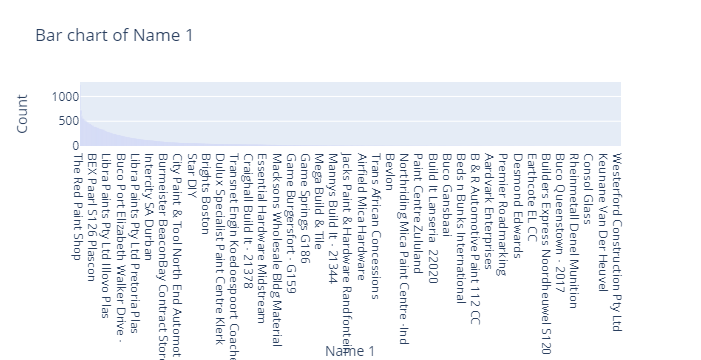

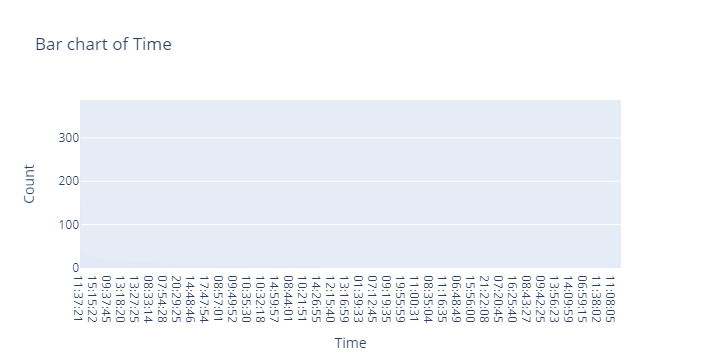

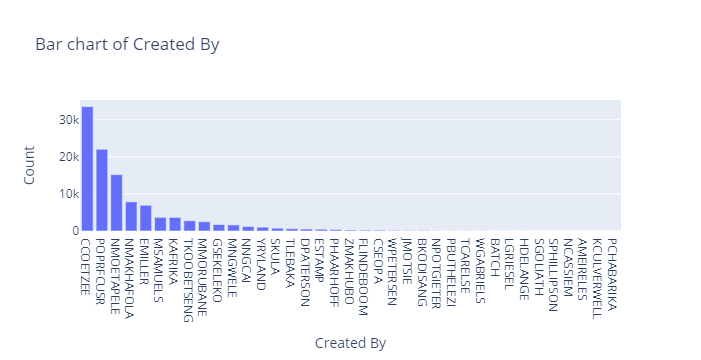

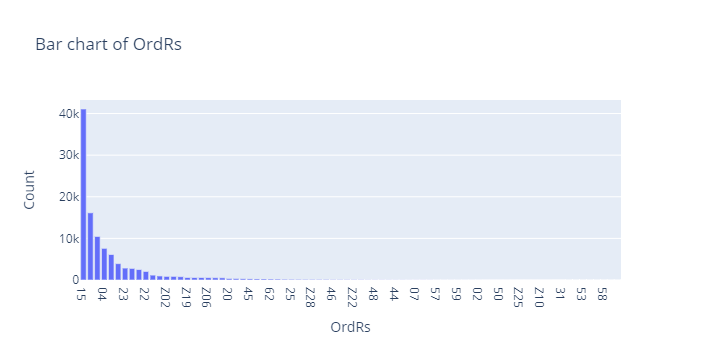

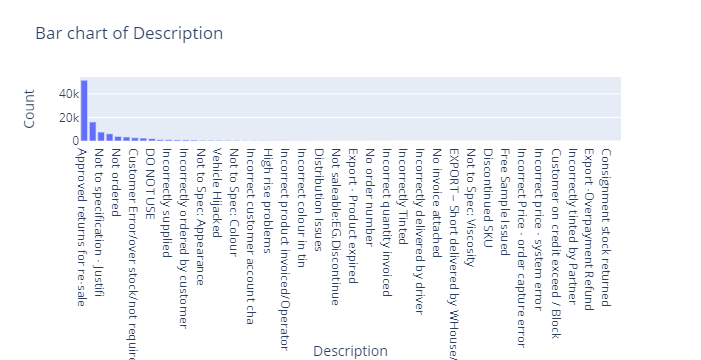

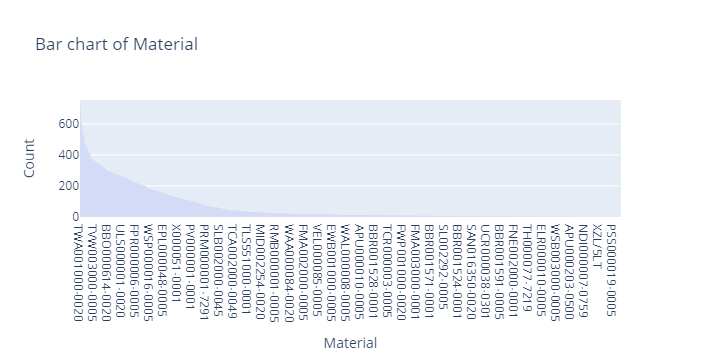

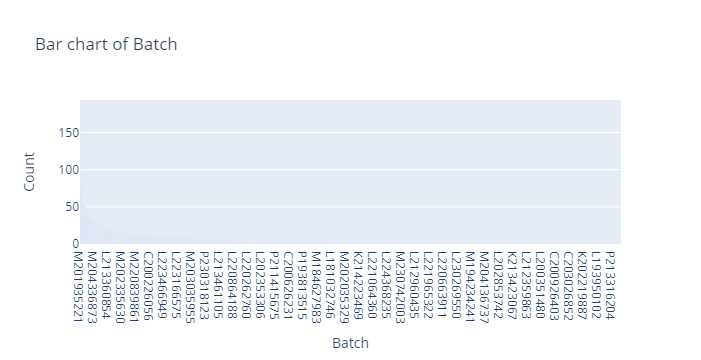

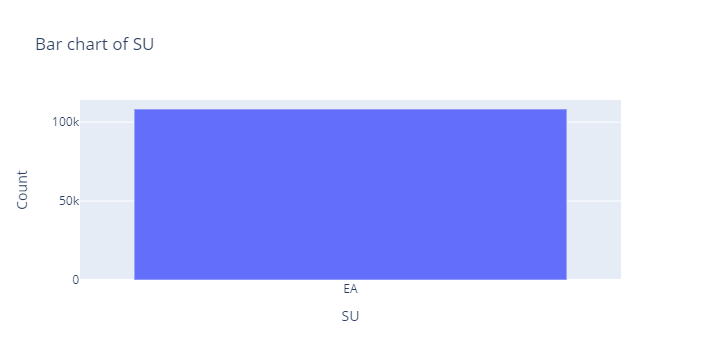

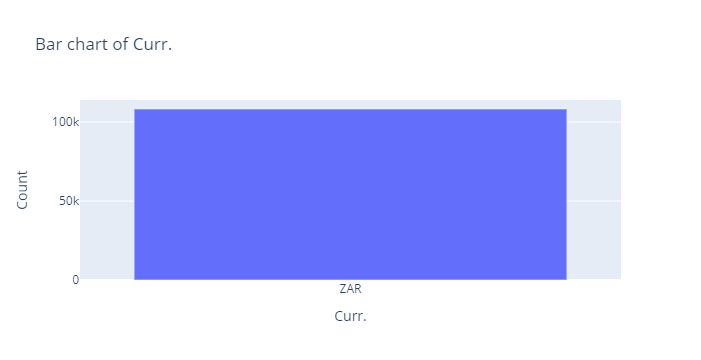

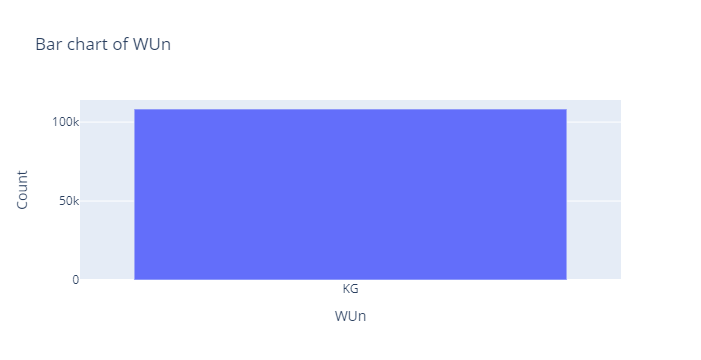

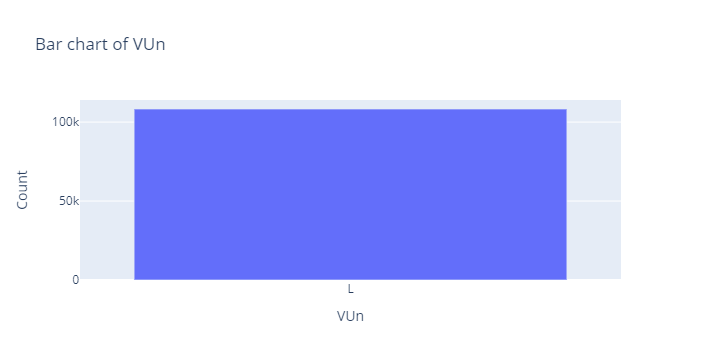

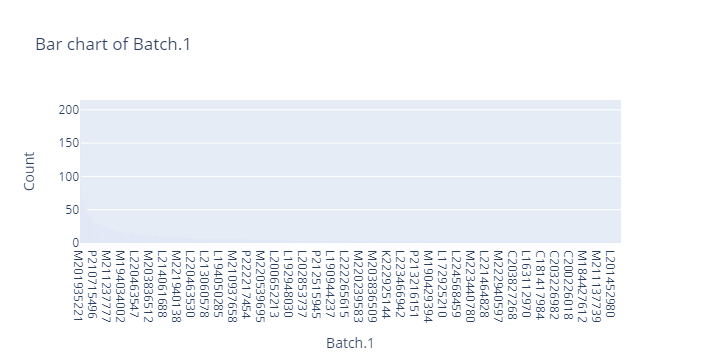

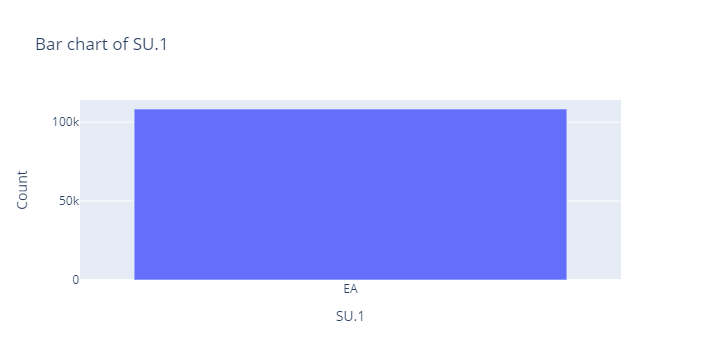

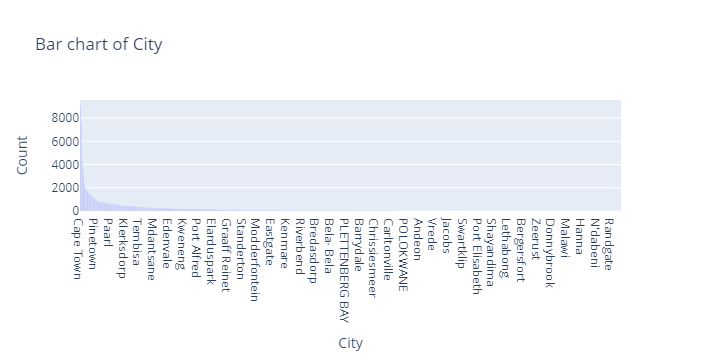

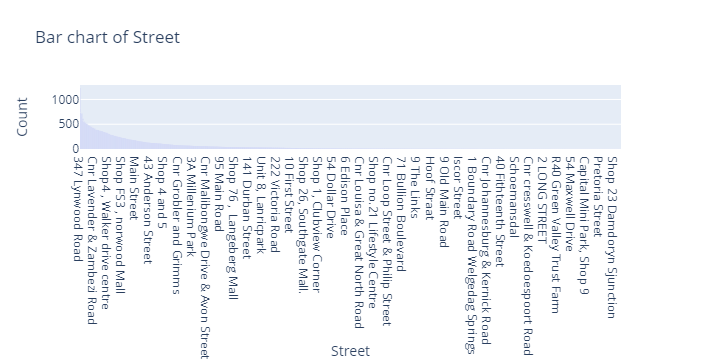

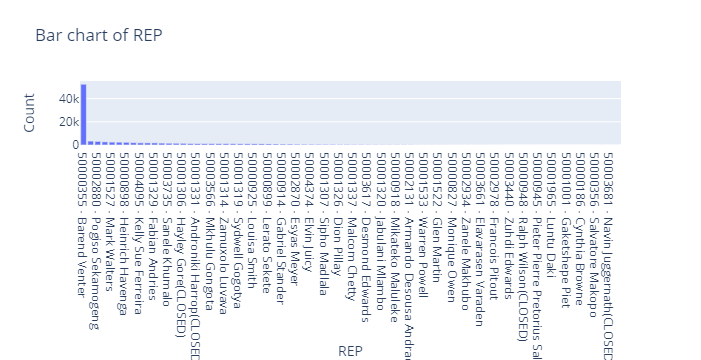

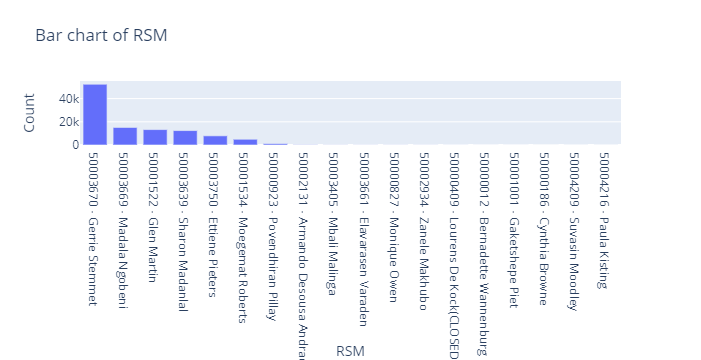

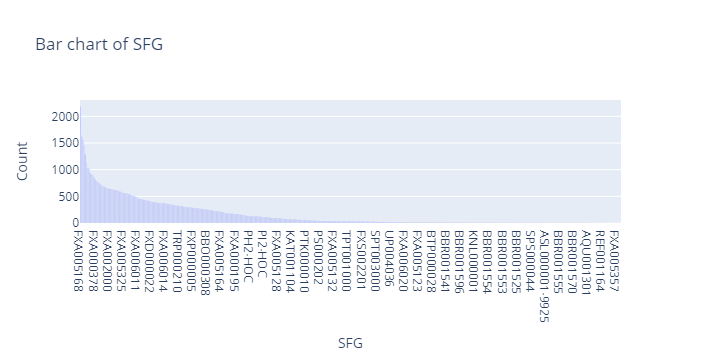

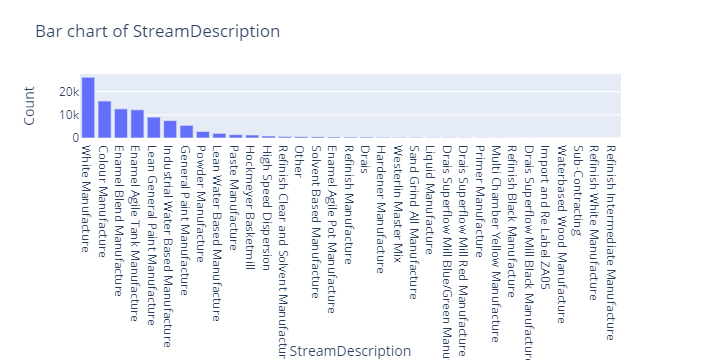

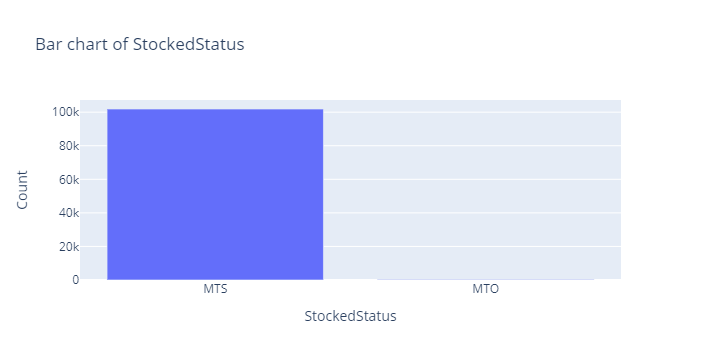

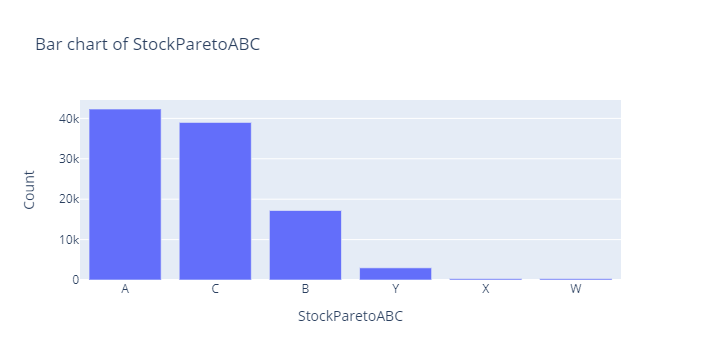

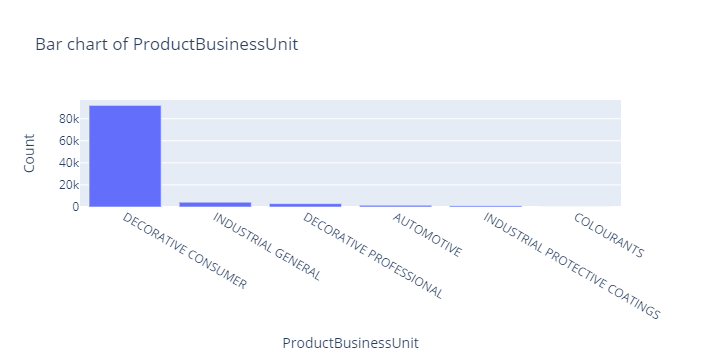

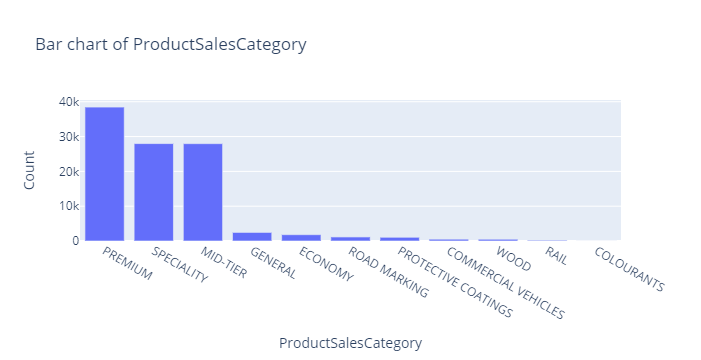

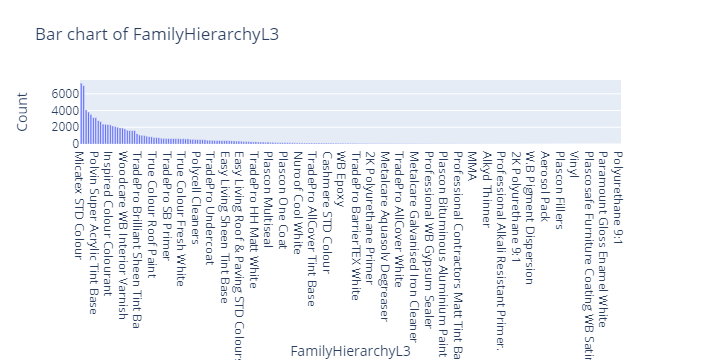

In [18]:
import plotly.express as px

# Loop through each categorical column in the dataframe
for column in df_returns_join.select_dtypes(include=['object']):
    # Get value counts and convert to a DataFrame
    counts = df_returns_join[column].value_counts().reset_index()
    
    # Rename columns for clarity
    counts.columns = [column, 'Count']
    
    # Create the Plotly bar chart
    fig = px.bar(counts, x=column, y='Count', title=f'Bar chart of {column}')
    
    # Show the interactive chart with zoom and scroll features
    fig.show()


## 4: Data Preparation

#### 4.1. Data Imputation & Cleaning

In [19]:
# find all missing data
df_returns_join.isnull().sum().sort_values(ascending=False)   # counts null values and arranges columns in ascending order with the most missing values

# in percentage form
for column in df_returns_join.columns:  
    percentage = df_returns_join[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')   

Plnt: 0.0%
SLoc: 0.13%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 22.57%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 1.8%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.01%
SLED/BBD: 0.01%
City: 0.17%
Street: 2.19%
REP: 0.0%
RSM: 0.0%
SFG: 5.59%
StreamDescription: 5.59%
StockedStatus: 5.59%
StockParetoABC: 5.59%
ProductBusinessUnit: 5.59%
ProductSalesCategory: 5.59%
FamilyHierarchyL3: 5.59%


In [31]:
# use the dropna method to even remove nofills

df_returns_nonulls = df_returns_join.dropna(subset=['Name 1','Description','Material','Volume','City','RSM','SFG','StreamDescription','StockParetoABC','ProductBusinessUnit','ProductSalesCategory', 'FamilyHierarchyL3'])

In [32]:
# Test to see if all rows containing null values have been removed

# in percentage form
for column in df_returns_nonulls.columns:  
    percentage = df_returns_nonulls[column].isnull().mean()   
    print(f'{column}: {round(percentage*100, 2)}%')  

Plnt: 0.0%
SLoc: 0.14%
Sold-to pt: 0.0%
Ship-to: 0.0%
Name 1: 0.0%
Created On: 0.0%
Time: 0.0%
Created By: 0.0%
OrdRs: 0.0%
Description: 0.0%
Sales Doc.: 0.0%
Item: 0.0%
Material: 0.0%
Batch: 21.61%
Order Quantity: 0.0%
SU: 0.0%
Net value: 0.0%
Curr.: 0.0%
Gross weight: 0.0%
WUn: 0.0%
Volume: 0.0%
VUn: 0.0%
Delivery: 0.0%
Item.1: 0.0%
Ac.GI date: 1.89%
Batch.1: 0.0%
Delivery quantity: 0.0%
SU.1: 0.0%
Order: 0.0%
Manuf. Dte: 0.01%
SLED/BBD: 0.01%
City: 0.0%
Street: 2.25%
REP: 0.0%
RSM: 0.0%
SFG: 0.0%
StreamDescription: 0.0%
StockedStatus: 0.0%
StockParetoABC: 0.0%
ProductBusinessUnit: 0.0%
ProductSalesCategory: 0.0%
FamilyHierarchyL3: 0.0%


In [22]:
# all columns intended to be used have no nan

#### 4.2. Feature Engineering (addition and subtraction)

Done in previous steps before EDA

In [33]:
# Filter out the useful columns

import pandas as pd

# Parameters filtered after first run
df_returns_filtered = df_returns_nonulls[['Name 1','Description','Material','Volume','City','RSM','SFG','StreamDescription','StockParetoABC','ProductSalesCategory','FamilyHierarchyL3']]

pd.set_option('display.max_rows', 5)
df_returns_filtered

Name 1                             Description  \
0       Game Canal Walk G060(Century)               Short delivered by driver   
1       Game Canal Walk G060(Century)               Short delivered by driver   
...                               ...                                     ...   
108280            Game Mthatha - G085  Customer Error/over stock/not required   
108281                 H & F Hardware               Short delivered by driver   

              Material  Volume         City                         RSM  \
0       OCC000001-0005    15.0    Milnerton   50003670 - Gerrie Stemmet   
1       GTC000001-0005    20.0    Milnerton   50003670 - Gerrie Stemmet   
...                ...     ...          ...                         ...   
108280  BBO000605-0020    80.0      Mthatha   50003670 - Gerrie Stemmet   
108281  TLS001000-0020    20.0  Piet Retief  50003750 - Ettiene Pieters   

              SFG         StreamDescription StockParetoABC  \
0       OCC000001         White Manufacture              B   
1       FXA000294  Enamel Blend Manufacture              C   
...           ...                       ...            ...   
108280  BBO000605        Colour Manufacture              A   
108281  FXA001106         White Manufacture              A   

       ProductSalesCategory                         FamilyHierarchyL3  
0                SPECIALITY                          Plascon One Coat  
1                  MID-TIER            True Colour Bright Gloss White  
...                     ...                                       ...  
108280              PREMIUM                        Micatex STD Colour  
108281              PREMIUM  Professional Superior Low Sheen Tint Bas  

[102085 rows x 11 columns]

In [24]:
# PCA is not required as this is categorical data
# data balancing not required as this is not supervised learning

#### 4.3. Outlier Identification and Removal

In [25]:
# no outlier detection or removal required with categorical data


#### 4.4. Normalize the Data

In [26]:
# No normalization required for categorical data

#### 4.4. Dimensional Reduction (MCA)

Multi-component analysis can be used for categorical data feature reduction. But few features here so not required.

## 5: Model Development

-------------------------------------
Parameters
    -----------
- **n_clusters**:
  - *Type*: `int`
  - *Default*: `8`
  - *Description*: Number of clusters to form and centroids to generate.

- **max_iter**:
  - *Type*: `int`
  - *Default*: `300`
  - *Description*: Maximum number of iterations for a single run of the algorithm.

- **cat_dissim**:
  - *Type*: `func`
  - *Default*: `matching_dissim`
  - *Description*: Dissimilarity function for categorical variables.

- **init**:
  - *Type*: `str or ndarray`
  - *Default*: `'Cao'`
  - *Description*: Method for initializing centroids:
    - `'Huang'`: Huang's method
    - `'Cao'`: Cao's method
    - `'random'`: Randomly select initial centroids
    - `ndarray`: User-provided initial centroids

- **n_init**:
  - *Type*: `int`
  - *Default*: `10`
  - *Description*: Number of times the algorithm will be run with different centroid seeds.

- **verbose**:
  - *Type*: `int`, optional
  - *Description*: Verbosity mode for logging information during execution.


In [35]:
import numpy as np
X = df_returns_filtered.values[:,1:]  # list all columns as list to be used in cluster model
X

array([['Short delivered by driver', 'OCC000001-0005', 15.0, ..., 'B',
        'SPECIALITY', 'Plascon One Coat'],
       ['Short delivered by driver', 'GTC000001-0005', 20.0, ..., 'C',
        'MID-TIER', 'True Colour Bright Gloss White'],
       ['Incorrectly ordered by customer', 'TCR000002-0020', 20.0, ...,
        'A', 'MID-TIER', 'True Colour Roof Paint'],
       ...,
       ['Customer Error/over stock/not required', '101801-7238', 2.0,
        ..., 'C', 'SPECIALITY', 'Polycell Fillers'],
       ['Customer Error/over stock/not required', 'BBO000605-0020', 80.0,
        ..., 'A', 'PREMIUM', 'Micatex STD Colour'],
       ['Short delivered by driver', 'TLS001000-0020', 20.0, ..., 'A',
        'PREMIUM', 'Professional Superior Low Sheen Tint Bas']],
      dtype=object)

In [36]:
 !pip install kmodes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 778132.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5072, cost: 714223.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11247, cost: 689344.0
Run 1, iteration: 2/100, moves: 3492, cost: 689335.0
Run 1, iteration: 3/100, moves: 1, cost: 689335.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20307, cost: 652916.0
Run 1, iteration: 2/100, moves: 1204, cost: 652916.0
Initializ

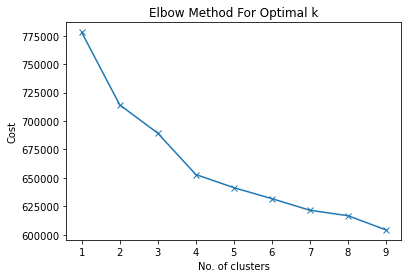

In [37]:
# import necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline


# screen plot or elbow curve to find the optimal K value

cost = []
K = range(1,10)  # max K values to iterate through
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode.fit_predict(X)  # fit the model 
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# elbow at 4


kmode = KModes(n_clusters=4, init = "Cao", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20307, cost: 652916.0
Run 1, iteration: 2/100, moves: 1204, cost: 652916.0


array([0, 1, 2, ..., 3, 2, 0], dtype=uint16)

In [39]:
# add this column back to the original dataframe

# Convert clusters to a list
clusters_list = clusters.tolist()

# Add the 'Cluster' column back to the original DataFrame using .assign
df_returns_filtered = df_returns_filtered.assign(Cluster=clusters_list)

# Display the updated DataFrame
print(df_returns_filtered)


                               Name 1                             Description  \
0       Game Canal Walk G060(Century)               Short delivered by driver   
1       Game Canal Walk G060(Century)               Short delivered by driver   
...                               ...                                     ...   
108280            Game Mthatha - G085  Customer Error/over stock/not required   
108281                 H & F Hardware               Short delivered by driver   

              Material  Volume         City                         RSM  \
0       OCC000001-0005    15.0    Milnerton   50003670 - Gerrie Stemmet   
1       GTC000001-0005    20.0    Milnerton   50003670 - Gerrie Stemmet   
...                ...     ...          ...                         ...   
108280  BBO000605-0020    80.0      Mthatha   50003670 - Gerrie Stemmet   
108281  TLS001000-0020    20.0  Piet Retief  50003750 - Ettiene Pieters   

              SFG         StreamDescription StockParetoABC  \


In [40]:
# download to Excel
# determining the name of the file
file_name = 'Clusters.xlsx'
  
# saving the excel
df_returns_filtered.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## 6: Model Evaluation

In [41]:
# count the number of entries in each cluster
df_returns_cluster_count = df_returns_filtered.groupby(['Cluster'])[["Cluster"]].count()
df_returns_cluster_count

Cluster
Cluster         
0          44008
1          20351
2          15283
3          22443

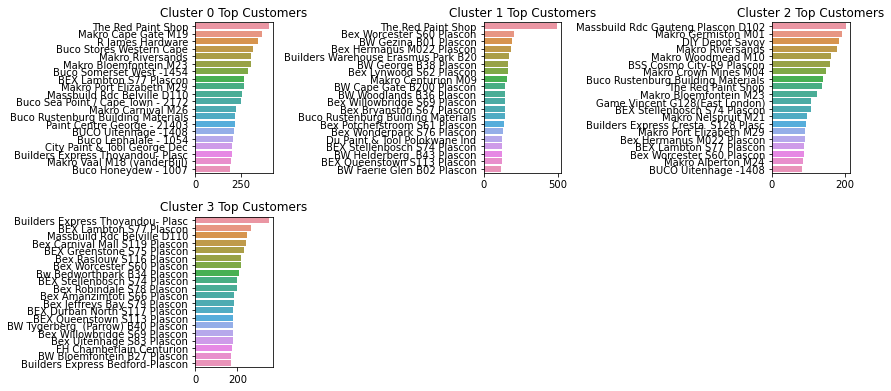

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter each cluster's data separately
df_cluster0data = df_returns_filtered[df_returns_filtered['Cluster'] == 0]
df_cluster1data = df_returns_filtered[df_returns_filtered['Cluster'] == 1]
df_cluster2data = df_returns_filtered[df_returns_filtered['Cluster'] == 2]
df_cluster3data = df_returns_filtered[df_returns_filtered['Cluster'] == 3]


# Function to get top customers by cluster
def get_top_customers(df_cluster, n=20):
    return df_cluster['Name 1'].value_counts().nlargest(n)

# Get top customers for each cluster
top_customers_cluster0 = get_top_customers(df_cluster0data)
top_customers_cluster1 = get_top_customers(df_cluster1data)
top_customers_cluster2 = get_top_customers(df_cluster2data)
top_customers_cluster3 = get_top_customers(df_cluster3data)


# Plotting top customers for each cluster
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
sns.barplot(x=top_customers_cluster0.values, y=top_customers_cluster0.index)
plt.title('Cluster 0 Top Customers')

plt.subplot(3, 3, 2)
sns.barplot(x=top_customers_cluster1.values, y=top_customers_cluster1.index)
plt.title('Cluster 1 Top Customers')

plt.subplot(3, 3, 3)
sns.barplot(x=top_customers_cluster2.values, y=top_customers_cluster2.index)
plt.title('Cluster 2 Top Customers')

plt.subplot(3, 3, 4)
sns.barplot(x=top_customers_cluster3.values, y=top_customers_cluster3.index)
plt.title('Cluster 3 Top Customers')

plt.tight_layout()
plt.show()

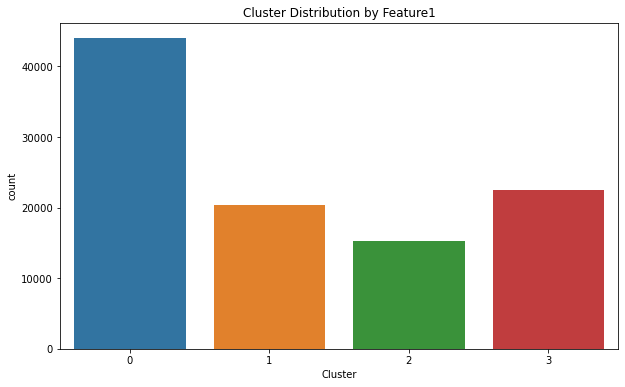

In [45]:
# Add cluster labels to DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize cluster distribution using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_returns_filtered, x='Cluster')
plt.title('Cluster Distribution by Feature1')
plt.show()

## 6: Model Deployment